In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
crop = pd.read_csv('E:\Projects\Plant/Crop_recommendation.csv')

In [3]:
#first 5 dataset
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# Information about the null, data type and memory of the data.
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
# Statistical information about the data.
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
#shape of the data
crop.shape

(2200, 8)

# Auto Exploratory Data Analysis (EDA)

In [7]:
import sys

from pandas_profiling import ProfileReport
cp = ProfileReport(crop)
cp.to_file(output_file = 'crop.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Pre-processing

In [8]:
#view the columns
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [10]:
#check for missing values
crop.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
#check for duplicates
crop.duplicated().sum()

0

In [12]:
#convert categorical to numeric
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

crop['label'] = lb.fit_transform(crop['label'])
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


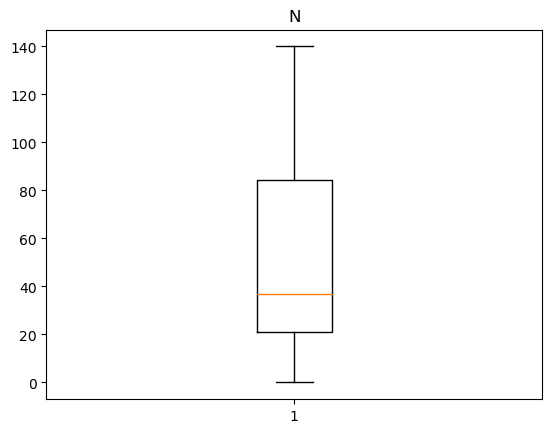

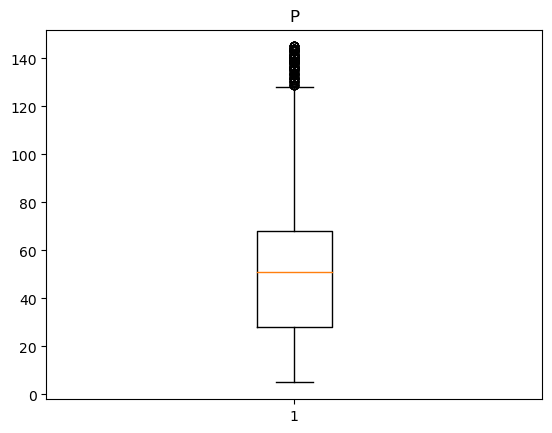

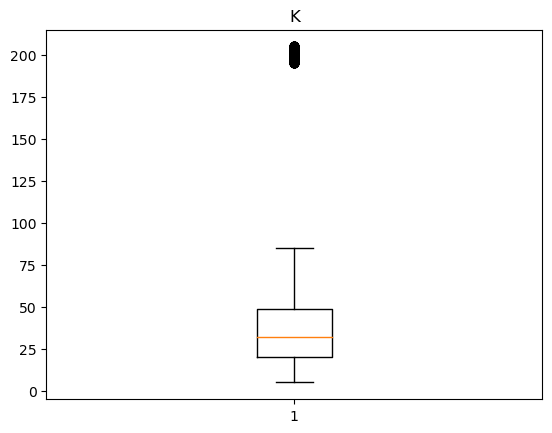

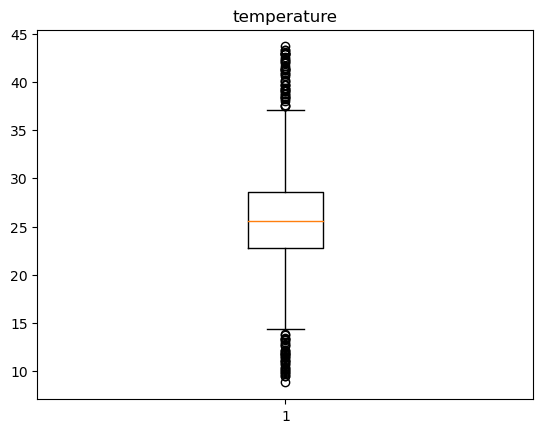

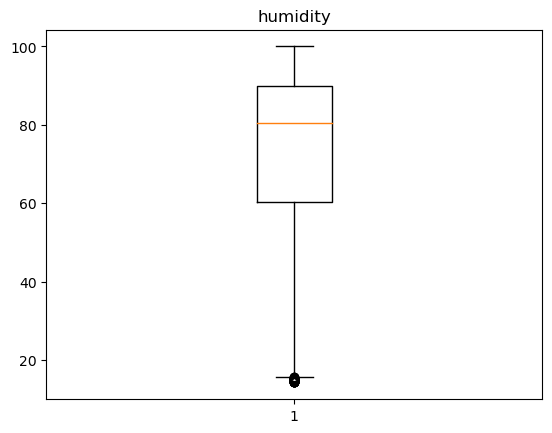

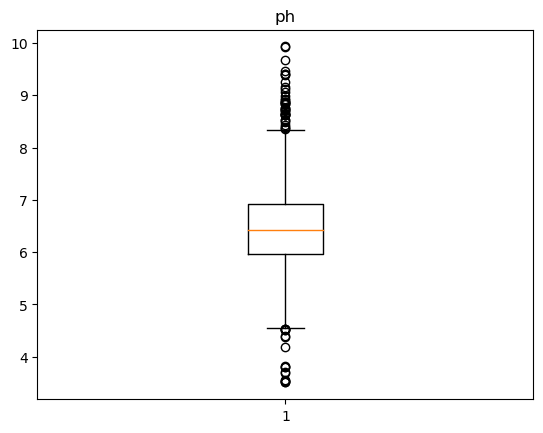

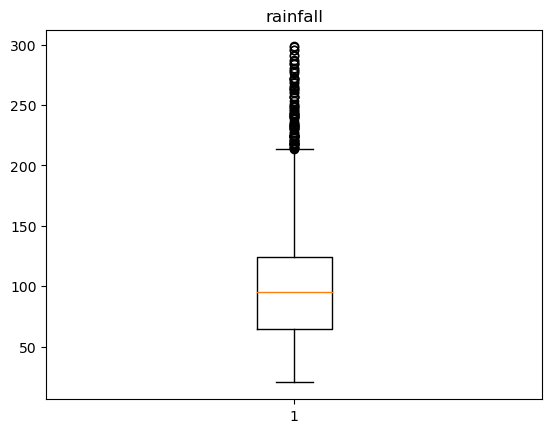

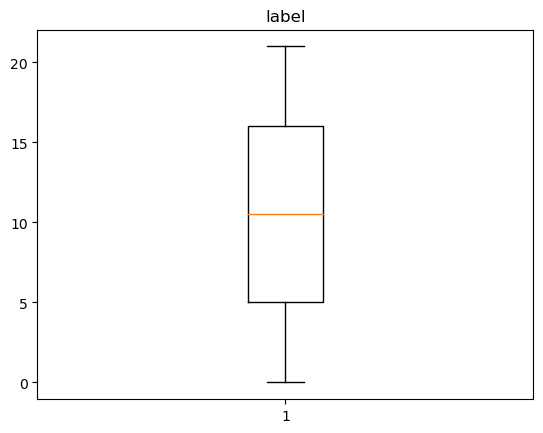

In [13]:
#check for outliers
col = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

for i in col:
    plt.boxplot(crop[i]);
    plt.title(i);
    plt.show()

There are outliers

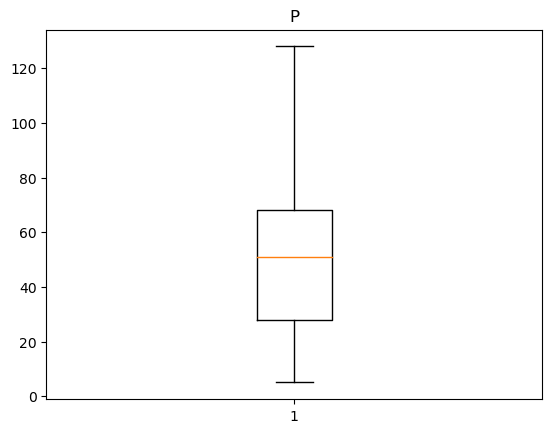

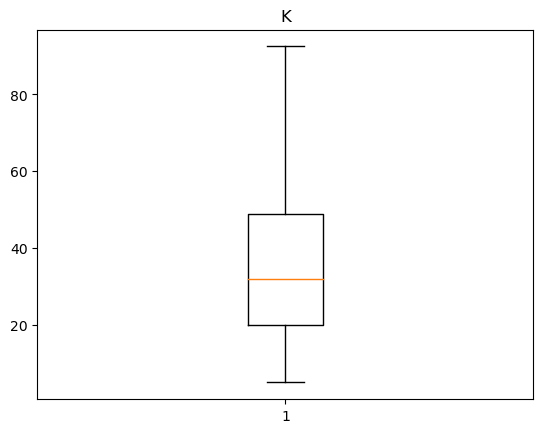

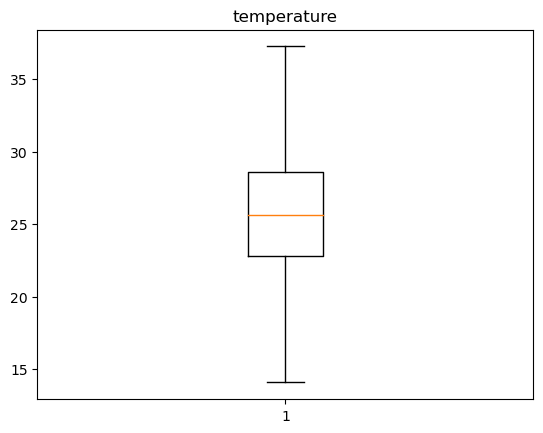

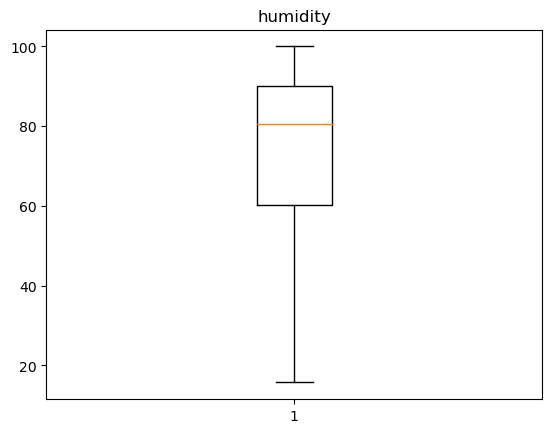

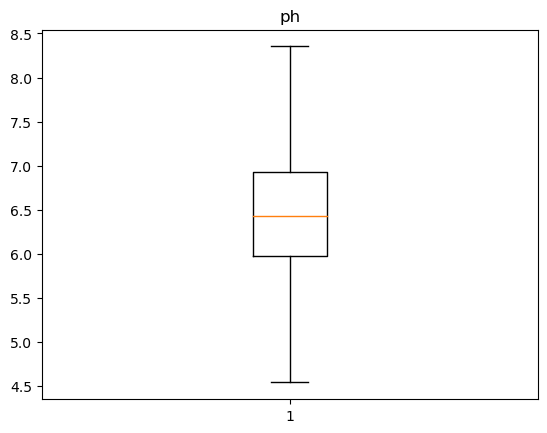

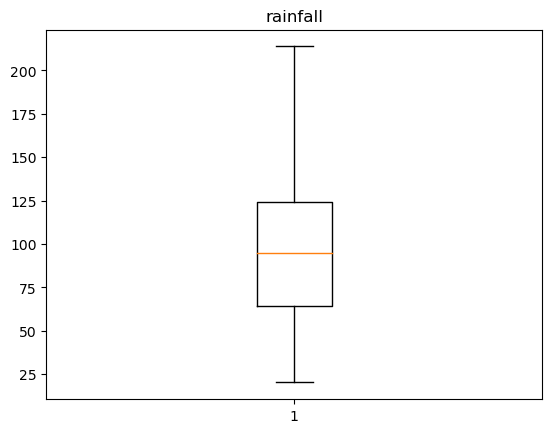

In [14]:
cols = ['P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

from feature_engine.outliers.winsorizer import Winsorizer

winsorizer = Winsorizer(capping_method ='iqr',
                       tail='both',
                       fold=1.5
                       )

for i in cols:
    c_t = winsorizer.fit_transform(crop[[i]])

    winsorizer.left_tail_caps_, winsorizer.right_tail_caps_

    plt.boxplot(c_t[i]);plt.title(i);plt.show()

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


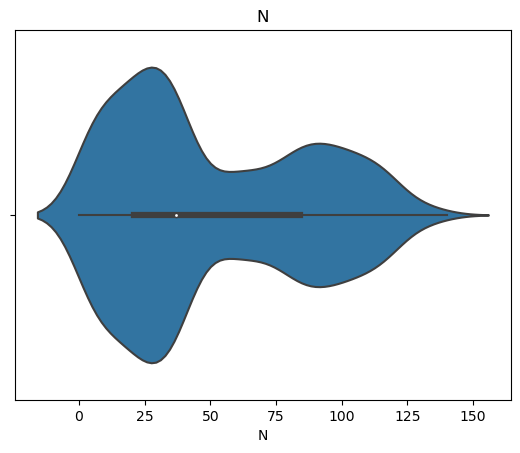

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


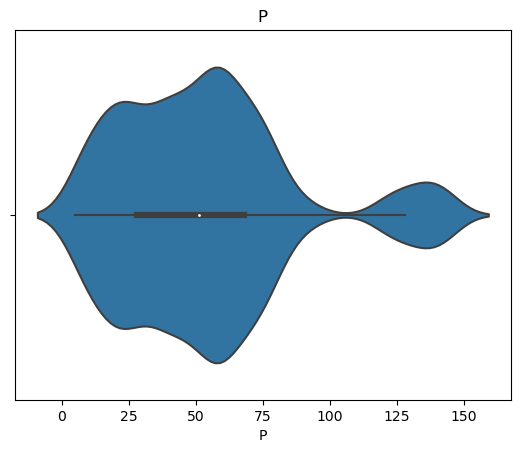

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


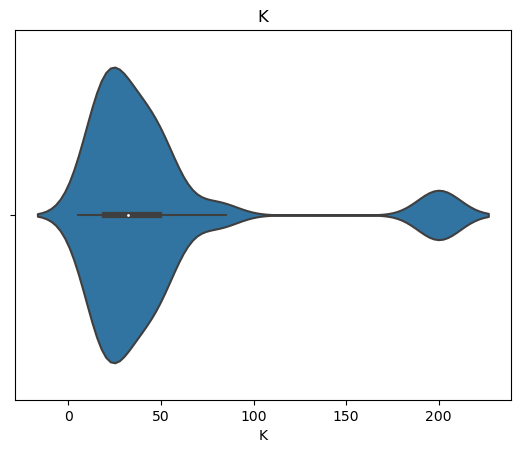

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


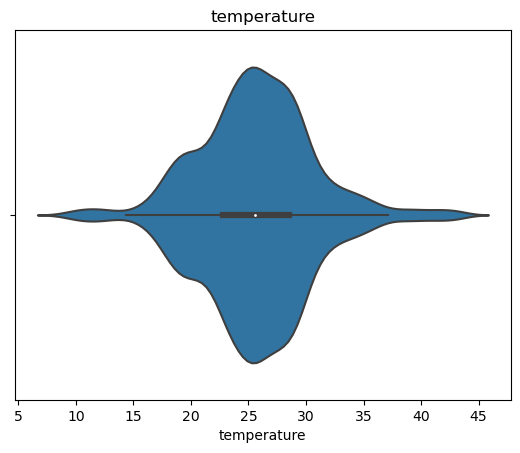

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


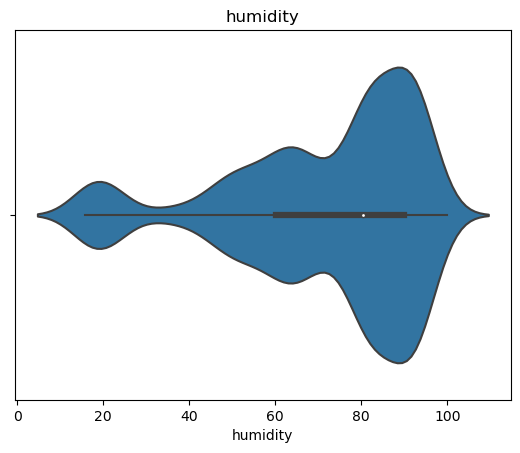

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


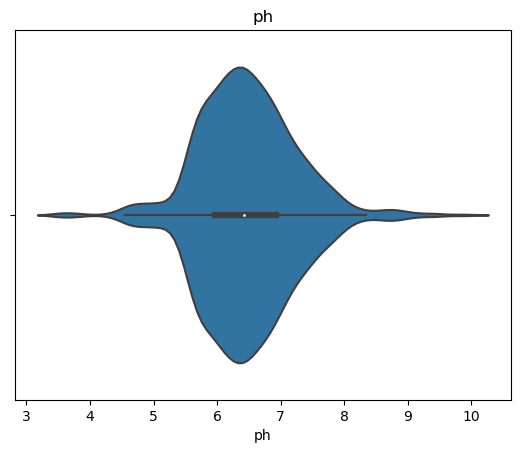

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


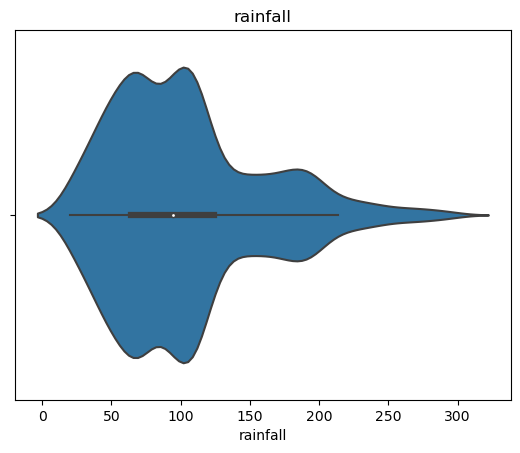

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


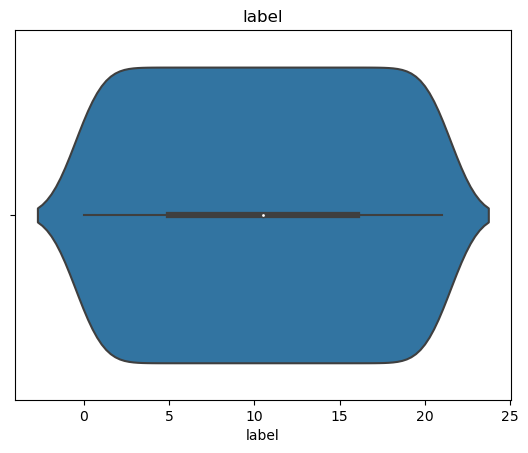

In [15]:
#violin plot
col = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


for i in col:
    sns.violinplot(crop[i]);
    plt.title(i);
    plt.show()


C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


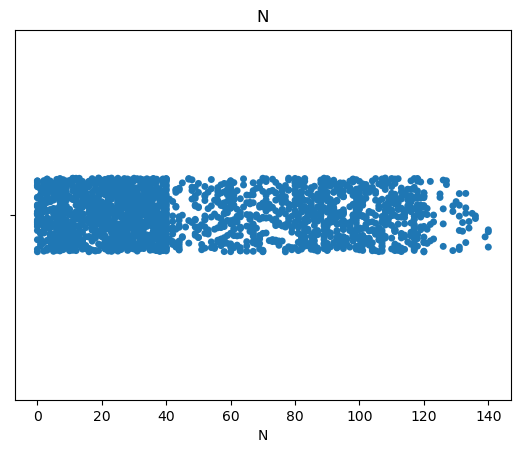

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


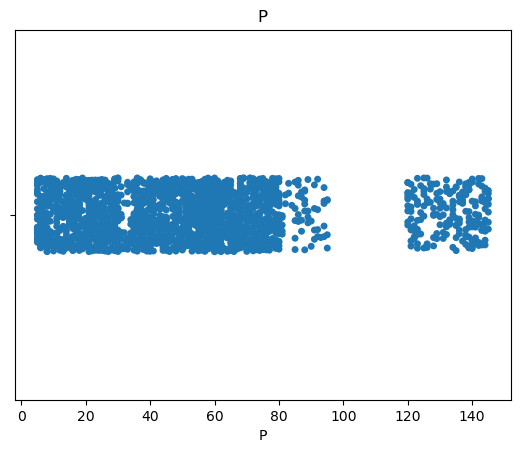

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


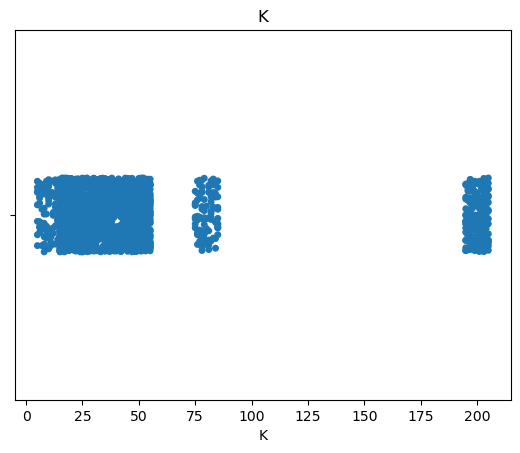

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


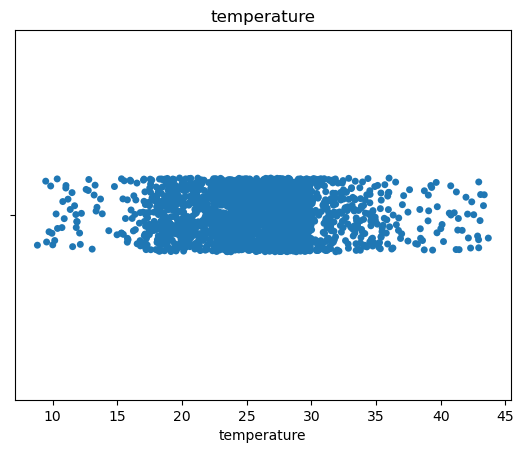

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


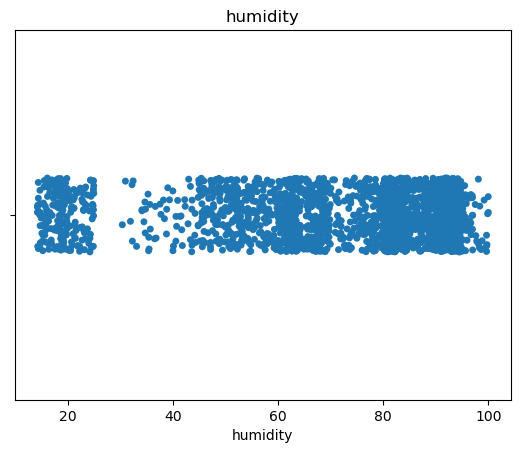

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


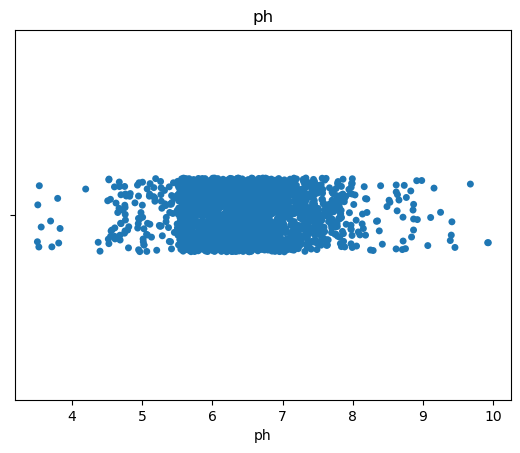

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


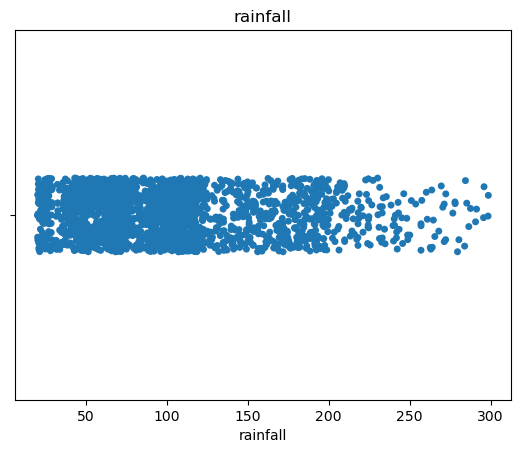

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


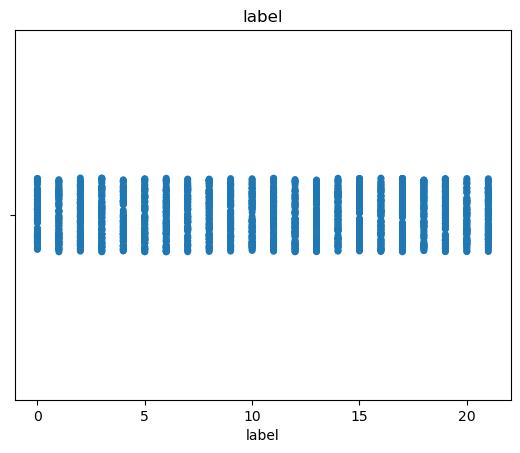

In [17]:
#stripplot
col = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


for i in col:
    sns.stripplot(crop[i]);
    plt.title(i);
    plt.show()

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


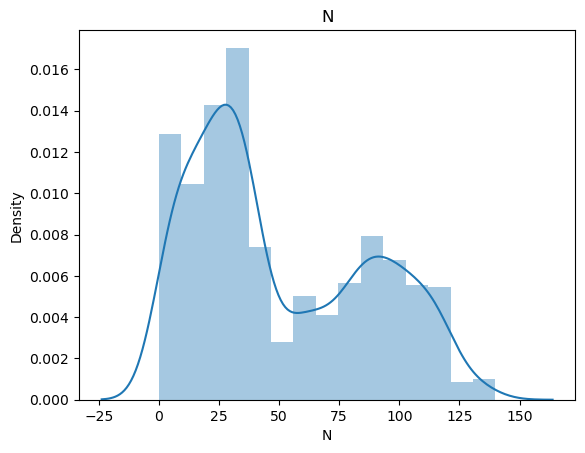

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


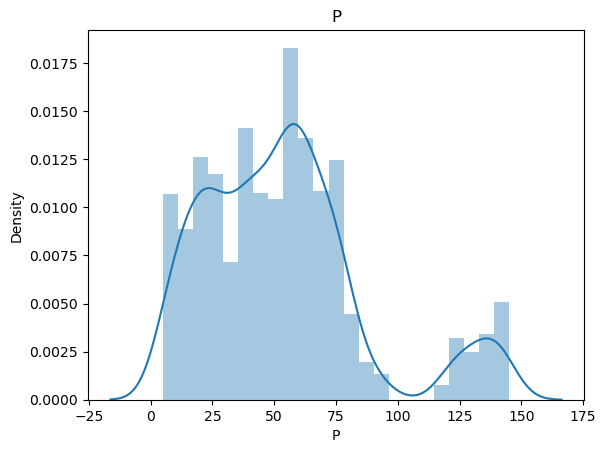

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


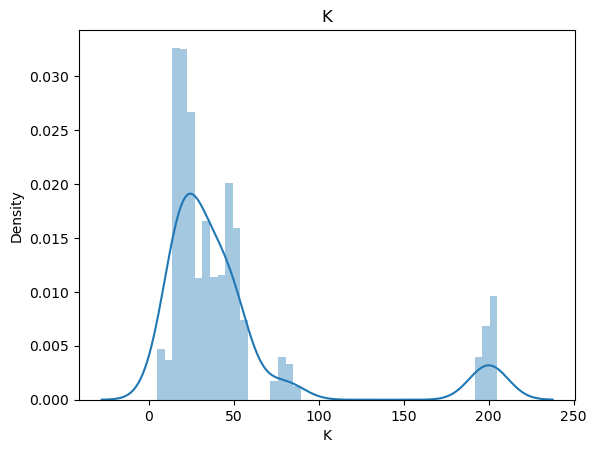

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


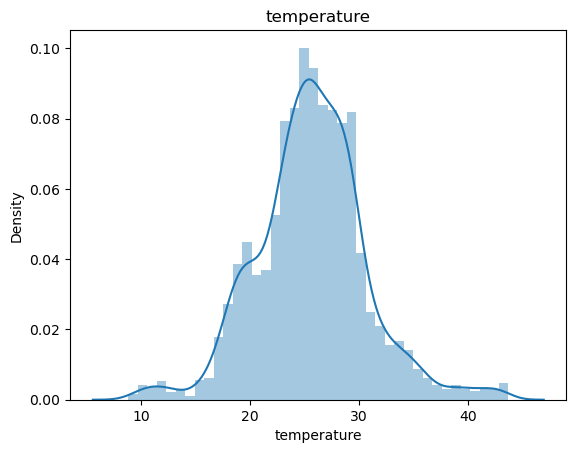

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


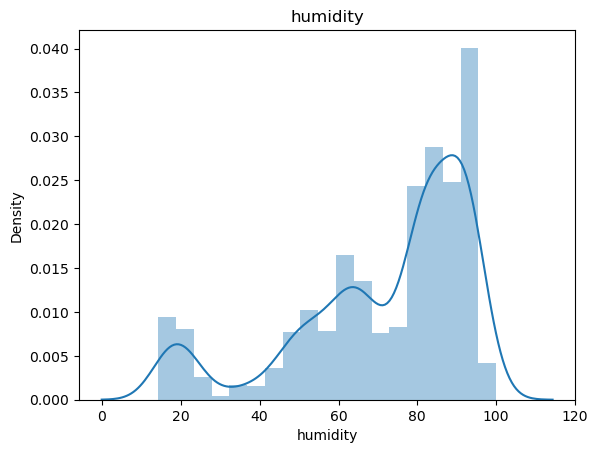

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


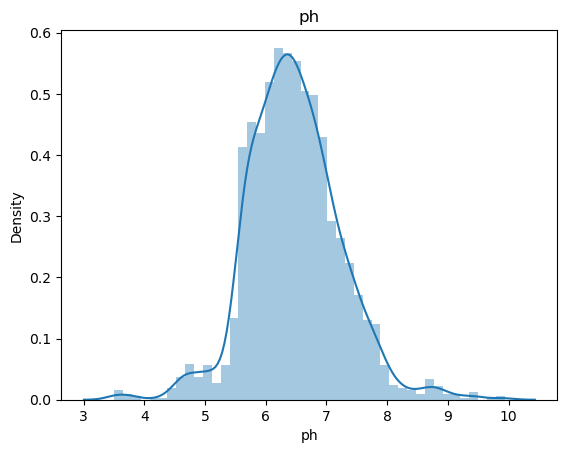

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


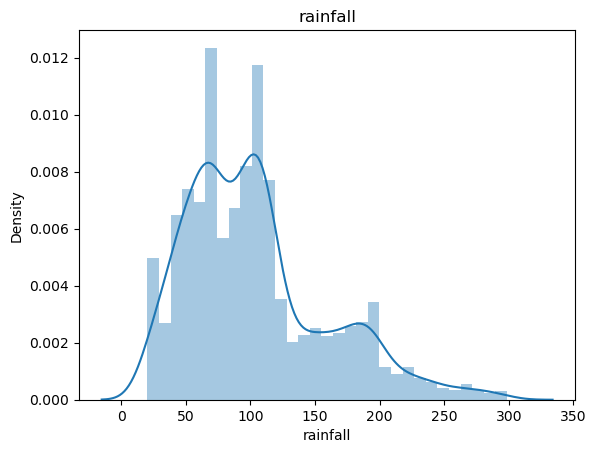

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


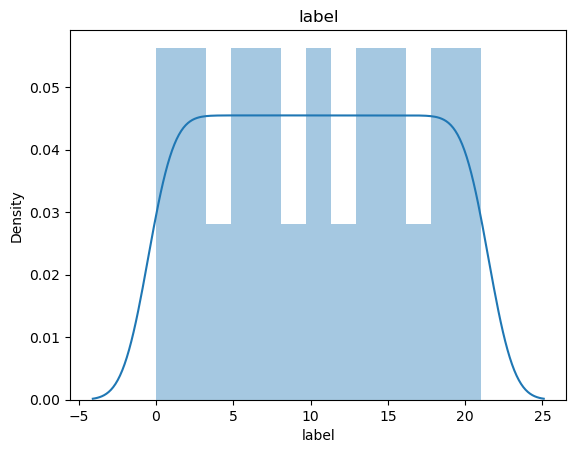

In [20]:
col = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

#distplot
for i in col:
    sns.distplot(crop[i]);
    plt.title(i);
    plt.show()

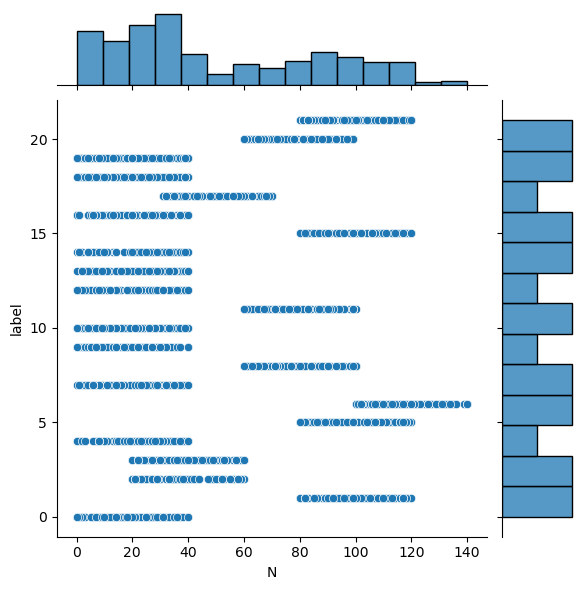

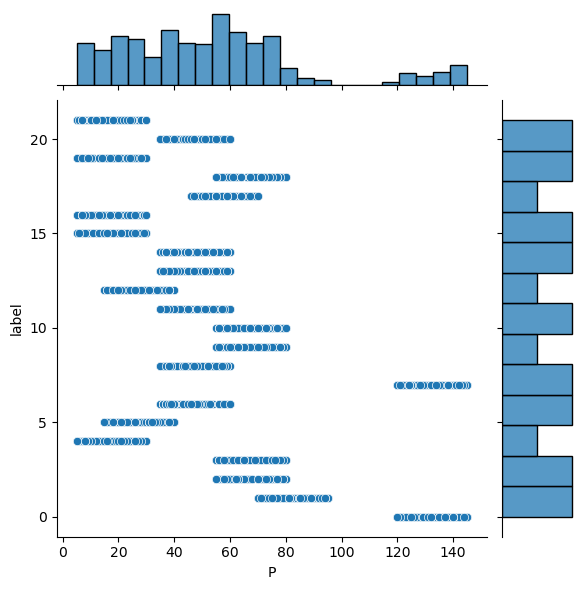

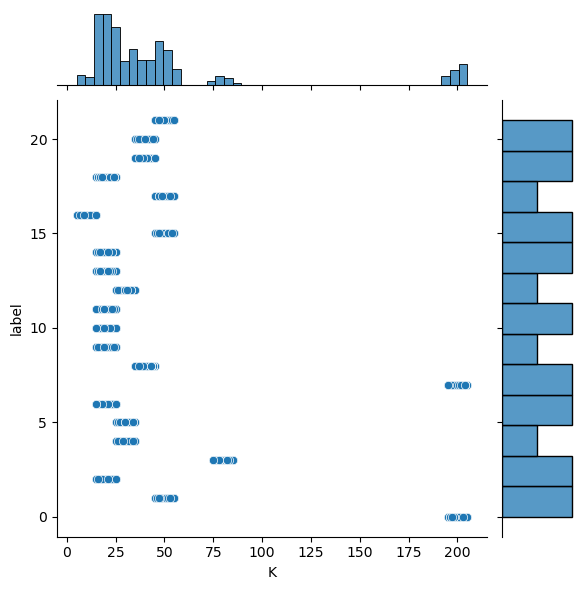

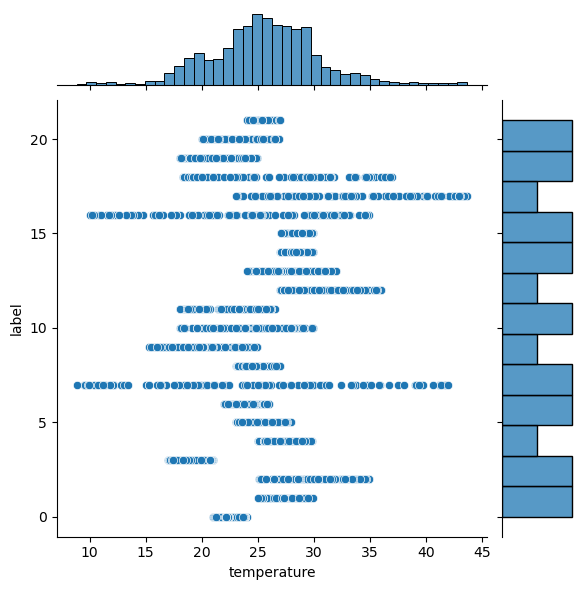

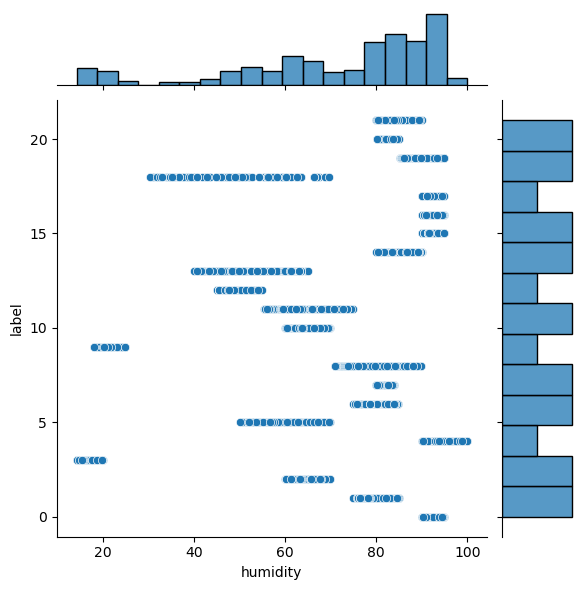

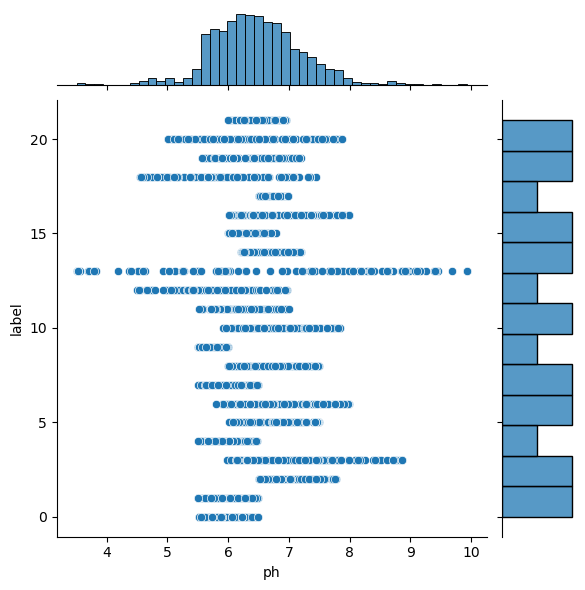

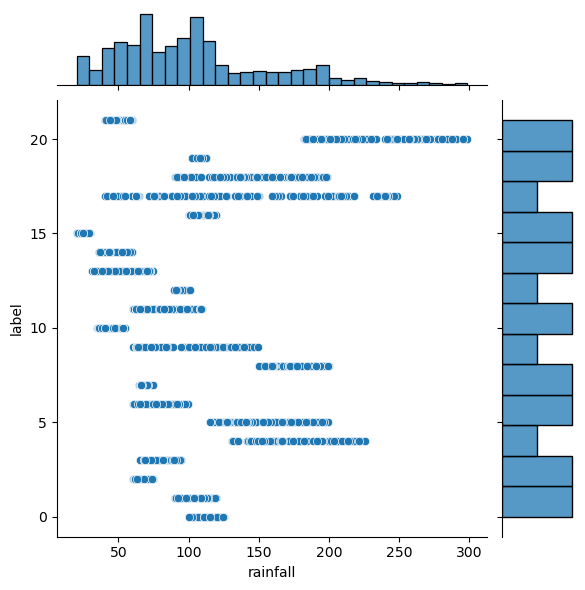

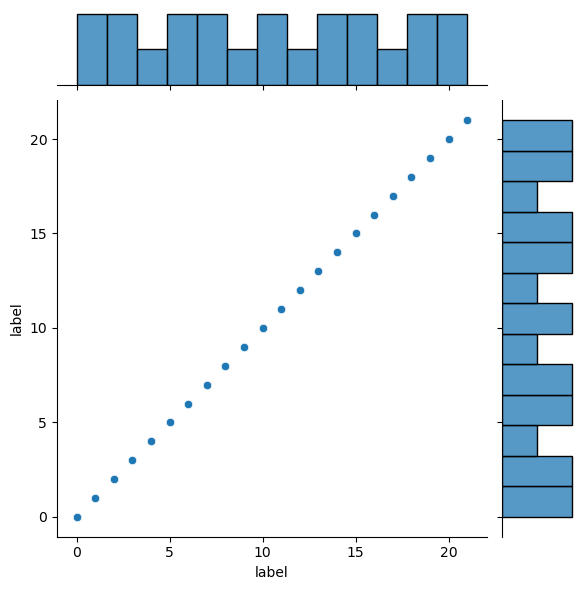

In [21]:
col = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

#jointplot
for i in col:
    sns.jointplot(x = crop[i], y = crop['label']);
    plt.show()

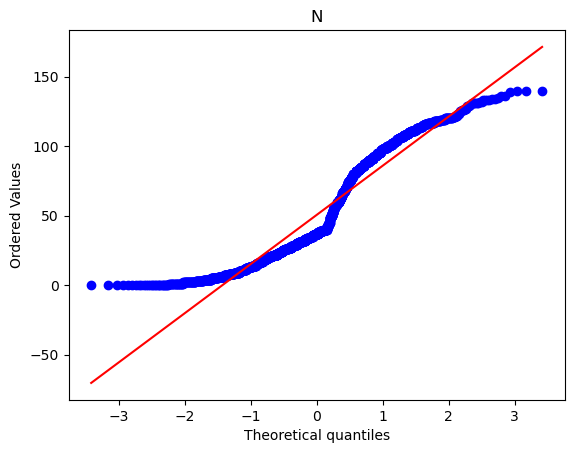

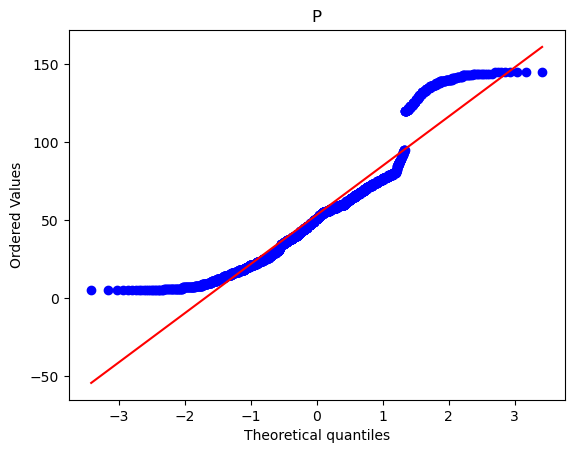

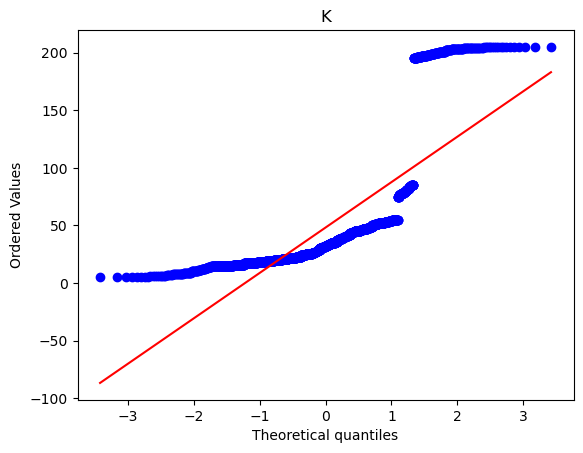

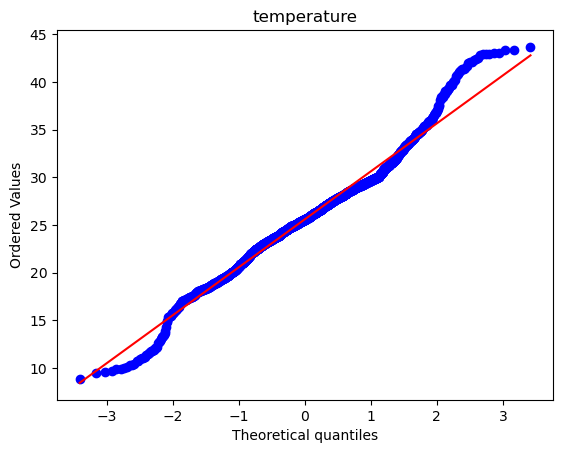

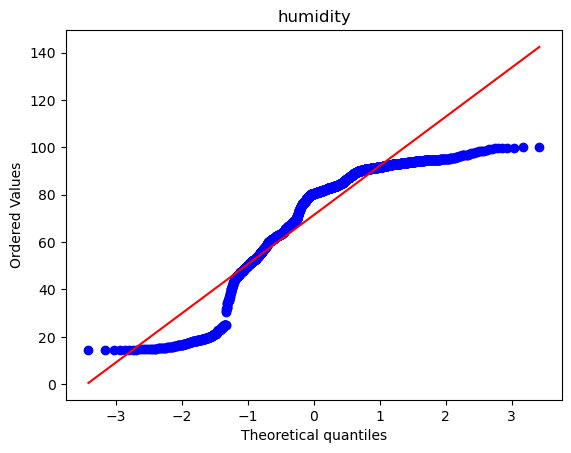

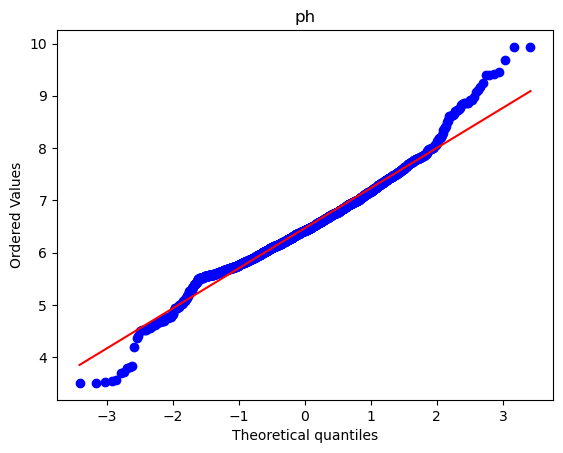

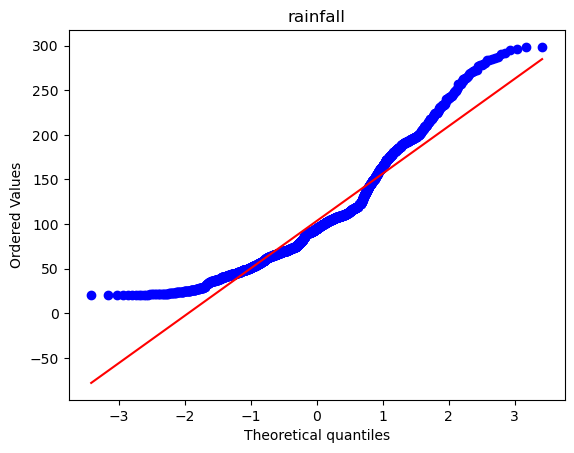

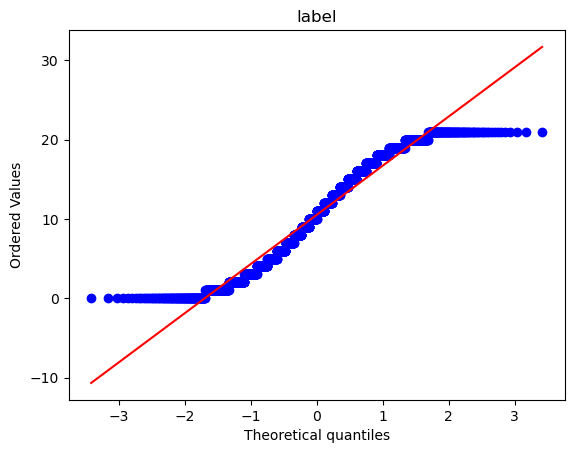

In [22]:
#Q-Q plot
from scipy import stats
import pylab

col = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

for i in col:
    stats.probplot(crop[i], dist = 'norm', plot = pylab)
    plt.title(i)
    plt.show()

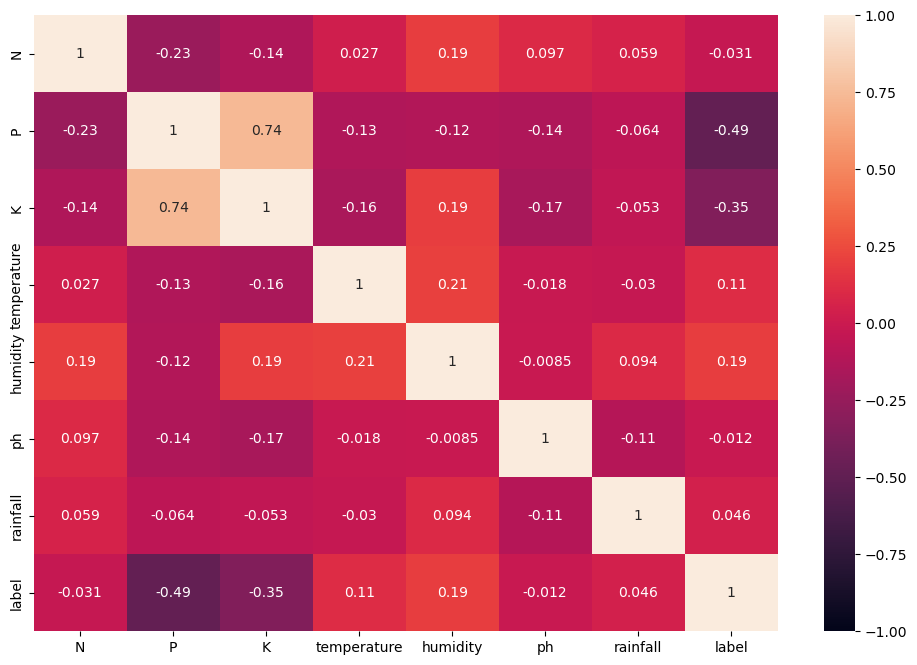

In [23]:
#HeatMap

plt.figure(figsize=(12,8))
sns.heatmap(crop.corr(), annot = True, vmax = 1, vmin = -1)
plt.show()

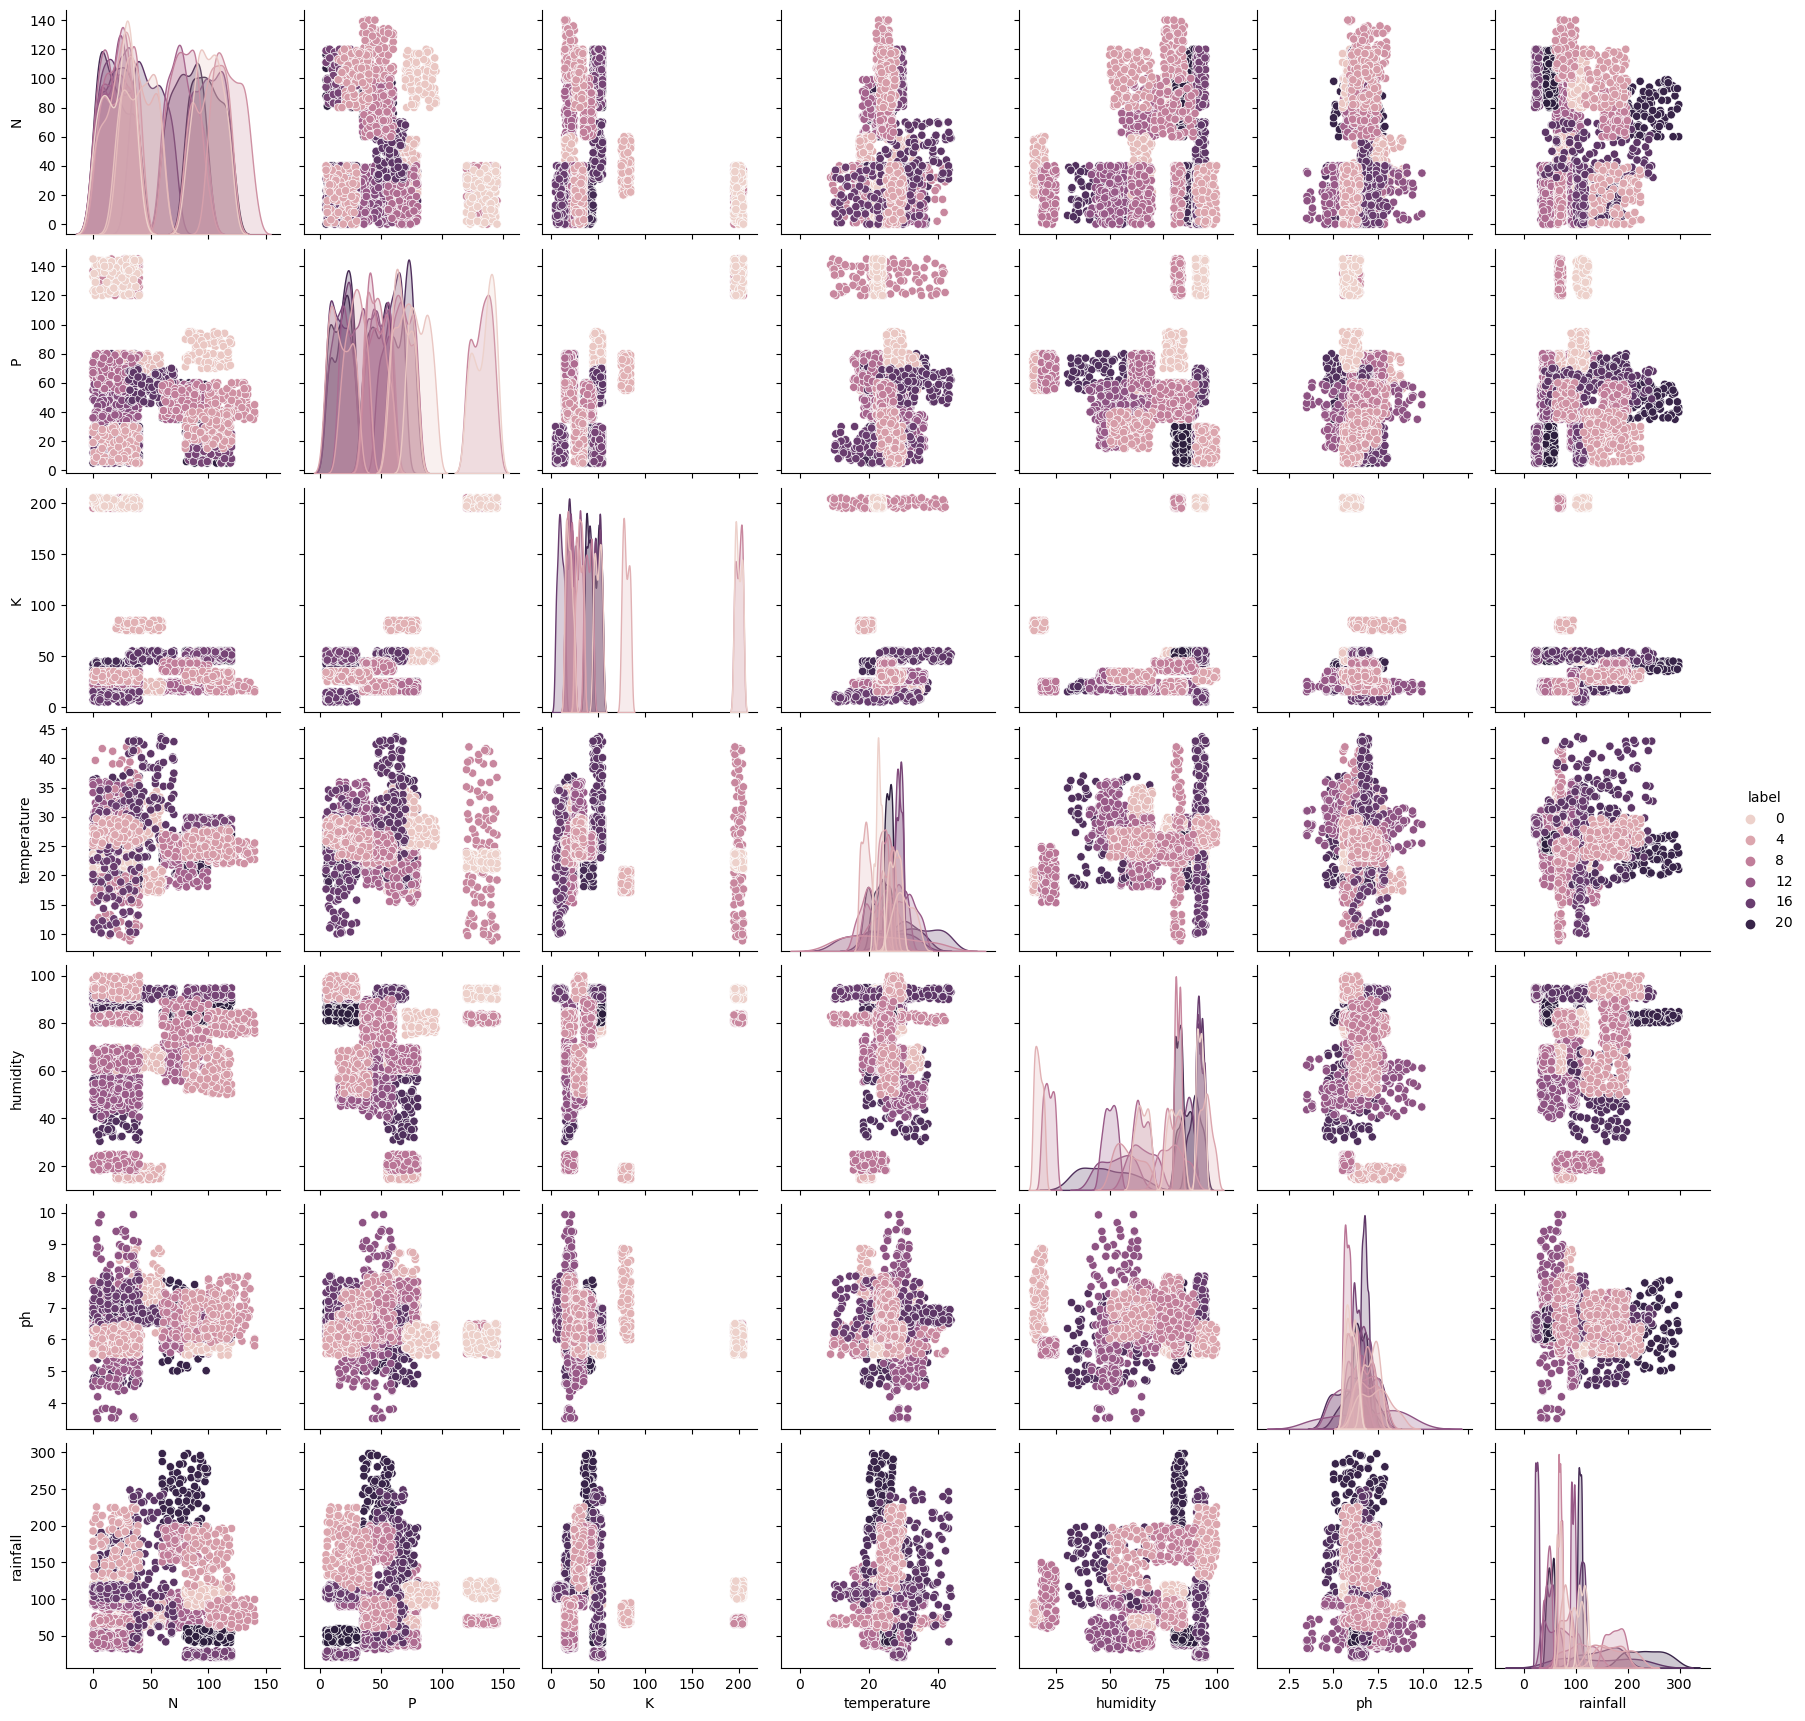

In [24]:
#pairplot
sns.pairplot(crop, hue = 'label')
plt.show()

In [25]:
#check for varience
crop.var()

N              1362.889537
P              1088.068460
K              2565.212869
temperature      25.641550
humidity        495.677307
ph                0.598980
rainfall       3020.424469
label            40.268304
dtype: float64

In [26]:
#Skewness
crop.skew()

N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
label          0.000000
dtype: float64

In [27]:
#kurtosis
crop.kurtosis()

N             -1.058240
P              0.860279
K              4.449354
temperature    1.232555
humidity       0.302134
ph             1.655581
rainfall       0.607079
label         -1.204980
dtype: float64

In [28]:
#Predictors
X = crop.iloc[:, :-1]

#Target
y = crop.iloc[:, -1]

In [29]:
#Normalization
def norm(i):
    X = (i - i.min())/(i.max() - i.min())
    return (X)

In [30]:
crop_norm = norm(X)

In [31]:
crop = pd.concat([crop_norm, y], axis=1)
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458,20
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675,20
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710,20
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905,20
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231,20
...,...,...,...,...,...,...,...,...
2195,0.764286,0.207143,0.135,0.515037,0.608410,0.509353,0.566064,5
2196,0.707143,0.071429,0.110,0.533473,0.494359,0.401561,0.386972,5
2197,0.842857,0.200000,0.125,0.439202,0.617880,0.444433,0.550071,5
2198,0.835714,0.192857,0.145,0.500627,0.441760,0.506045,0.384280,5


In [32]:
X.shape

(2200, 7)

In [33]:
y.value_counts()

20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: label, dtype: int64

# Model Building

In [34]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape) 
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (1760, 7)
X_test shape:  (440, 7)
y_train shape:  (1760,)
y_test shape:  (440,)


Auto ML - TPOT

In [36]:
from tpot import TPOTClassifier

pipeline_optimizer = TPOTClassifier(generations=5, population_size=50, max_time_mins = 60, random_state = 42, verbosity=2)

pipeline_optimizer.fit(X_train, y_train)

print(pipeline_optimizer.score(X_test, y_test))

C:\Users\Sushri Supravat\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9954545454545455

Generation 2 - Current best internal CV score: 0.9954545454545455

Generation 3 - Current best internal CV score: 0.9954545454545455

Generation 4 - Current best internal CV score: 0.9954545454545455

Generation 5 - Current best internal CV score: 0.9954545454545455

Best pipeline: GaussianNB(input_matrix)
0.9954545454545455


C:\Users\Sushri Supravat\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [37]:
pipeline_optimizer.fitted_pipeline_
pipeline_optimizer.export('tpot_exported_pipeline.py')

In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

exported_pipeline = GaussianNB(var_smoothing=1e-02)

In [86]:
exported_pipeline.fit(X_train, y_train)
y_test_pred = exported_pipeline.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(confusion_matrix(y_test, y_test_pred))
print('Test accuracy is: ', accuracy_score(y_test, y_test_pred))
print('********')

y_train_pred = exported_pipeline.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print('Train accuracy is: ', accuracy_score(y_train, y_train_pred))

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [88]:
result_test = pd.DataFrame({'Actual': y_test, "Predicted": y_test_pred})
result_test.head(10)

,Actual,Predicted
1451,15,15
1334,21,21
1761,17,17
1735,17,17
1576,0,0
1110,12,12
1594,0,0
530,13,13
651,14,14
819,10,10


In [89]:
result_train = pd.DataFrame({'Actual':y_train, "Predicted": y_train_pred})
result_train.head(10)

,Actual,Predicted
1656,16,16
752,2,2
892,10,10
1041,1,1
1179,12,12
162,11,11
1523,0,0
973,19,19
1104,12,12
1900,6,6


In [90]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.81      0.96      0.88        23
           9       0.95      1.00      0.98        20
          10       0.79      1.00      0.88        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

In [91]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        79
           2       0.98      1.00      0.99        80
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        73
           5       1.00      1.00      1.00        83
           6       0.98      1.00      0.99        83
           7       1.00      1.00      1.00        86
           8       0.85      1.00      0.92        77
           9       0.98      1.00      0.99        80
          10       0.98      1.00      0.99        89
          11       1.00      0.97      0.99        79
          12       1.00      1.00      1.00        81
          13       1.00      0.95      0.97        76
          14       1.00      1.00      1.00        81
          15       1.00      1.00      1.00        83
          16       1.00      1.00      1.00        86
          17       1.00    

# Save the Model

In [92]:
import pickle
pickle.dump(exported_pipeline, open('crop.pkl', 'wb'))

In [93]:
# Load the model from disk
model = pickle.load(open('crop.pkl', 'rb'))
print(model.predict([[90,42,43,20.87974371,82.00274423,6.502985292,202.9355362]]))

[20]


C:\Users\Sushri Supravat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
